<a href="https://colab.research.google.com/github/wingwingz/AFP/blob/main/Country_Rotation_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
import seaborn as sns
from datetime import datetime
import warnings
from collections import defaultdict
import os

%matplotlib inline
warnings.filterwarnings('ignore')

# from google.colab import drive
# drive.mount('/content/drive')

# Output directory
OUTPUT_DIR = 'Outputs/country_clusters/'
country_data_path = 'Data/country_data'

In [2]:
# BGRI
# Warning: The text data is approximate of index level

text = "M 6.6372549019608 266.07951918631534 L 7.4330888230592 261.51063337956543 L 8.2289227441576 254.2701109570042 L 9.024756665256 252.95365233472032 L 9.8205905863544 255.70272769301897 L 10.616424507453 262.3624595469256 L 11.412258428551 265.6923254738789 L 12.20809234965 268.4414008321776 L 13.003926270748 270.26121128062874 L 13.799760191847 267.3185390661119 L 14.595594112945 270.4160887656033 L 15.391428034043 260.9685621821544 L 16.187261955142 261.97526583448916 L 16.978358769567 259.9231391585761 L 17.774192690665 258.5292417938049 L 18.570026611764 256.4383957466482 L 19.365860532862 259.72954230235786 L 20.161694453961 261.8978270920019 L 20.957528375059 258.4905224225613 L 21.753362296157 253.41828478964402 L 22.549196217256 249.35275080906152 L 23.345030138354 244.00947757743876 L 24.140864059453 238.51132686084145 L 24.936697980551 233.28421174294965 L 25.73253190165 225.26930189551553 L 26.528365822748 213.96324549237173 L 27.324199743846 198.66909385113271 L 28.120033664945 186.12401756819236 L 28.915867586043 183.80085529357376 L 29.711701507142 188.75693481276008 L 30.50753542824 189.53132223763293 L 31.303369349338 189.06668978270923 L 32.099203270437 189.22156726768378 L 32.895037191535 189.95723532131302 L 33.690871112634 191.69960702727695 L 34.486705033732 186.04657882570507 L 35.282538954831 178.49630143319467 L 36.078372875929 170.63626907073512 L 36.874206797027 169.08749422098938 L 37.670040718126 162.73751733703193 L 38.465874639224 168.15822931114195 L 39.261708560323 173.036870087841 L 40.057542481421 179.58044382801666 L 40.858113509193 185.03987517337035 L 41.653947430291 188.91181229773466 L 42.449781351389 190.46058714748037 L 43.245615272488 190.6541840036986 L 44.041449193586 193.2871012482663 L 44.837283114685 186.04657882570507 L 45.633117035783 182.40695792880263 L 46.428950956882 183.29750346740641 L 47.22478487798 198.9401294498382 L 48.020618799078 171.41065649560798 L 48.816452720177 160.68539066111884 L 49.612286641275 155.6131530282016 L 50.408120562374 158.51710587147485 L 51.203954483472 163.66678224687936 L 51.99978840457 167.8484743411928 L 52.795622325669 173.46278317152107 L 53.591456246767 178.6898982894129 L 54.387290167866 180.93562182154417 L 55.183124088964 182.40695792880263 L 55.978958010063 185.93042071197414 L 56.774791931161 186.78224687933428 L 57.570625852259 185.34963014331947 L 58.361722666685 180.47098936662044 L 59.157556587783 176.05698104484514 L 59.953390508881 179.34812760055482 L 60.74922442998 188.91181229773466 L 61.545058351078 195.45538603791033 L 62.340892272177 200.60506241331487 L 63.136726193275 201.7279241793805 L 63.932560114373 201.8053629218678 L 64.728394035472 203.2379796578826 L 65.52422795657 197.0428802588997 L 66.320061877669 189.7636384650948 L 67.115895798767 184.92371705963942 L 67.911729719866 180.7807443365696 L 68.707563640964 170.5201109570042 L 69.503397562062 158.1299121590384 L 70.299231483161 155.6131530282016 L 71.095065404259 162.66007859454467 L 71.890899325358 170.98474341192792 L 72.686733246456 177.91551086454 L 73.482567167554 184.76883957466484 L 74.278401088653 189.80235783633844 L 75.074235009751 194.60355987055019 L 75.87006893085 187.8663892741563 L 76.665902851948 176.0957004160888 L 77.461736773047 166.68689320388356 L 78.257570694145 161.18874248728622 L 79.053404615243 149.53421174294965 L 79.849238536342 144.26837725381418 L 80.64507245744 152.63176144244107 L 81.440906378539 163.62806287563572 L 82.24147740631 177.0636846971799 L 83.037311327409 187.67279241793807 L 83.833145248507 194.29380490060106 L 84.628979169605 193.48069810448453 L 85.424813090704 194.8745954692557 L 86.220647011802 193.51941747572818 L 87.016480932901 191.42857142857144 L 87.812314853999 199.288603791031 L 88.608148775098 231.7354368932039 L 89.403982696196 216.51872399445216 L 90.199816617294 210.32362459546928 L 90.995650538393 210.01386962552016 L 91.791484459491 215.86049468331024 L 92.58731838059 225.57905686546465 L 93.383152301688 234.91042533518265 L 94.178986222786 239.98266296809987 L 94.974820143885 242.73173832639856 L 95.770654064983 247.9201340730467 L 96.566487986082 247.3780628756357 L 97.357584800507 249.43018955154878 L 98.153418721605 244.66770688858068 L 98.949252642704 240.6408922792418 L 99.745086563802 233.01317614424414 L 100.5409204849 232.9744567730005 L 101.336754406 238.97595931576515 L 102.1325883271 253.68932038834953 L 102.9284222482 259.8457004160888 L 103.72425616929 270.02889505316693 L 104.52009009039 277.57917244567733 L 105.31592401149 276.6111881645862 L 106.11175793259 275.9142394822007 L 106.90759185369 267.5895746648174 L 107.70342577479 261.51063337956543 L 108.49925969588 254.30883032824784 L 109.29509361698 248.50092464170137 L 110.09092753808 242.3445446139621 L 110.88676145918 235.955848358761 L 111.68259538028 236.26560332871014 L 112.47842930138 248.19116967175222 L 113.27426322248 259.8457004160888 L 114.07009714357 273.4361997226075 L 114.86593106467 276.1465557096625 L 115.66176498577 276.72734627831716 L 116.45759890687 273.5910772075821 L 117.25343282797 274.55906148867314 L 118.04926674907 259.80698104484514 L 118.84510067016 240.7957697642164 L 119.64093459126 227.82478039759596 L 120.43676851236 214.38915857605178 L 121.23260243346 201.7279241793805 L 122.02843635456 199.86939435968563 L 122.82427027566 207.7294267221452 L 123.62010419675 215.51202034211747 L 124.42067522453 219.5775543227 L 125.21650914562 220.81657420249655 L 126.01234306672 213.45989366620435 L 126.80817698782 208.8135691169672 L 127.60401090892 198.43677762367085 L 128.39984483002 191.8157651410079 L 129.19567875112 185.62066574202498 L 129.99151267222 208.3102172907998 L 130.78734659331 185.65938511326863 L 131.58318051441 172.0688858067499 L 132.37901443551 163.31830790568657 L 133.17484835661 160.80154877484978 L 133.97068227771 160.06588072122057 L 134.76651619881 159.56252889505322 L 135.5623501199 156.11650485436897 L 136.358184041 155.7680305131762 L 137.1540179621 160.41435506241334 L 137.9498518832 157.31680536292188 L 138.74094869762 153.44486823855758 L 139.53678261872 154.87748497457238 L 140.33261653982 157.8201571890893 L 141.12845046092 157.08448913546005 L 141.92428438202 152.4768839574665 L 142.72011830312 153.44486823855758 L 143.51595222422 159.98844197873328 L 144.31178614531 170.32651410078597 L 145.10762006641 178.34142394822007 L 145.90345398751 182.6779935275081 L 146.69928790861 180.16123439667132 L 147.49512182971 178.22526583448914 L 148.29095575081 168.50670365233475 L 149.0867896719 158.8655802126676 L 149.882623593 150.15372168284793 L 150.6784575141 145.42995839112348 L 151.4742914352 135.8275543227 L 152.2701253563 120.26236708275545 L 153.0659592774 117.24225612575128 L 153.86179319849 124.52149791955623 L 154.65762711959 134.8595700416089 L 155.45346104069 146.8238557558946 L 156.24929496179 154.4515718908923 L 157.04512888289 161.96312991215905 L 157.84096280399 164.20885344429038 L 158.63679672508 153.59974572353215 L 159.43263064618 145.66227461858534 L 160.22846456728 140.9772306981045 L 161.02429848838 130.63915857605178 L 161.82013240948 111.20203421174298 L 162.61596633058 101.17371705963944 L 163.41180025168 96.9145862228387 L 164.20763417277 99.54750346740644 L 165.00346809387 111.58922792417943 L 165.80403912164 119.52669902912626 L 166.59987304274 122.97272306981048 L 167.39570696384 126.03155339805829 L 168.19154088494 120.33980582524273 L 168.98737480604 115.88707813222382 L 169.78320872714 112.13129912159042 L 170.57904264823 112.44105409153957 L 171.37487656933 126.10899214054558 L 172.17071049043 151.35402219140084 L 172.96654441153 135.47907998150717 L 173.76237833263 120.88187702265375 L 174.55821225373 118.79103097549705 L 175.35404617482 127.46417013407307 L 176.14988009592 136.911696717522 L 176.94571401702 140.47387887193716 L 177.74154793812 143.53270920018494 L 178.53738185922 148.411349976884 L 179.33321578032 150.54091539528434 L 180.12431259474 150.07628294036064 L 180.92014651584 151.31530282015723 L 181.71598043694 153.32871012482664 L 182.51181435804 157.08448913546005 L 183.30764827914 161.61465557096628 L 184.10348220023 177.6444752658345 L 184.89931612133 184.3816458622284 L 185.69515004243 192.28039759593162 L 186.49098396353 199.75323624595472 L 187.28681788463 213.3050161812298 L 188.08265180573 207.61326860841427 L 188.87848572682 204.5931576514101 L 189.67431964792 192.12552011095704 L 190.47015356902 184.42036523347207 L 191.26598749012 187.75023116042536 L 192.06182141122 182.83287101248268 L 192.85765533232 179.34812760055482 L 193.65348925342 174.08229311141938 L 194.44932317451 170.4426722145169 L 195.24515709561 173.61766065649564 L 196.04099101671 184.30420711974114 L 196.83682493781 194.95203421174298 L 197.63265885891 205.0577901063338 L 198.42849278001 204.94163199260288 L 199.2243267011 198.63037447988907 L 200.0201606222 198.97884882108187 L 200.8159945433 195.2617891816921 L 201.6118284644 192.51271382339345 L 202.4076623855 190.61546463245494 L 203.2034963066 183.06518723994455 L 203.99933022769 172.92071197411008 L 204.79516414879 170.868585298197 L 205.59099806989 180.2386731391586 L 206.38683199099 197.70110957004164 L 207.18740301876 207.49711049468334 L 207.98323693986 209.8202727693019 L 208.77907086096 211.36904761904765 L 209.57490478206 211.17545076282943 L 210.37073870316 206.60656495607955 L 211.16657262425 194.75843735552476 L 211.96240654535 188.2148636153491 L 212.75824046645 202.19255663430422 L 213.55407438755 222.79126213592235 L 214.34990830865 183.76213592233012 L 215.14574222975 170.94602404068425 L 215.94157615084 167.34512251502545 L 216.73741007194 173.07558945908463 L 217.53324399304 176.05698104484514 L 218.32907791414 175.24387424872864 L 219.12491183524 176.17313915857608 L 219.92074575634 182.94902912621362 L 220.71657967743 182.7554322699954 L 221.51241359853 184.80755894590848 L 222.30351041296 189.6861997226075 L 223.09934433406 192.24167822468797 L 223.89517825515 200.6437817845585 L 224.69101217625 208.11662043458162 L 225.48684609735 208.46509477577442 L 226.28268001845 214.46659731853907 L 227.07851393955 223.37205270457702 L 227.87434786065 220.4293804900601 L 228.67018178175 220.54553860379104 L 229.46601570284 212.91782246879336 L 230.26184962394 188.79565418400372 L 231.05768354504 173.036870087841 L 231.85351746614 158.78814147018034 L 232.64935138724 143.68758668515954 L 233.44518530834 136.48578363384192 L 234.24101922943 132.22665279704117 L 235.03685315053 129.94220989366622 L 235.83268707163 131.87817845584837 L 236.62852099273 136.05987055016186 L 237.42435491383 149.80524734165513 L 238.22018883493 163.0085529357374 L 239.01602275602 173.8499768839575 L 239.81185667712 184.07189089227927 L 240.60769059822 192.4739944521498 L 241.40352451932 200.02427184466023 L 242.19935844042 198.4754969949145 L 242.99519236152 192.16423948220066 L 243.79102628262 185.73682385575592 L 244.58686020371 186.162736939436 L 245.38269412481 178.72861766065654 L 246.17852804591 178.41886269070739 L 246.97436196701 182.09720295885347 L 247.77019588811 194.37124364308832 L 248.56602980921 197.00416088765604 L 249.36660083698 200.79865926953306 L 250.16243475808 195.2230698104485 L 250.95826867917 187.7115117891817 L 251.75410260027 165.98994452149793 L 252.54993652137 158.09119278779477 L 253.34577044247 150.037563569117 L 254.14160436357 163.74422098936665 L 254.93743828467 199.40476190476193 L 255.73327220576 181.0517799352751 L 256.52910612686 172.57223763291725 L 257.32494004796 169.74572353213134 L 258.12077396906 178.41886269070739 L 258.91660789016 181.4002542764679 L 259.71244181126 186.12401756819236 L 260.50827573236 188.25358298659273 L 261.30410965345 186.704808136847 L 262.09994357455 176.40545538603794 L 262.89577749565 166.06738326398525 L 263.68687431008 156.46497919556177 L 264.48270823117 143.7650254276468 L 265.27854215227 141.1321081830791 L 266.07437607337 122.77912621359226 L 266.87020999447 113.40903837263065 L 267.66604391557 112.98312528895056 L 268.46187783667 123.86326860841427 L 269.25771175776 128.62575127138237 L 270.05354567886 135.32420249653262 L 270.84937959996 135.78883495145635 L 271.64521352106 127.34801202034217 L 272.44104744216 118.63615349052245 L 273.23688136326 109.26606564956083 L 274.03271528436 96.9145862228387 L 274.82854920545 86.80883032824784 L 275.62438312655 73.60552473416556 L 276.42021704765 64.70006934812767 L 277.21605096875 50.915973185390726 L 278.01188488985 46.42452612112811 L 278.80771881095 53.12297734627839 L 279.60355273204 53.316574202496554 L 280.39938665314 55.601017105871506 L 281.19522057424 50.915973185390726 L 281.99105449534 47.353791030975515 L 282.78688841644 48.631530282015774 L 283.58272233754 39.609916782246955 L 284.37855625863 25.283749422098992 L 285.17439017973 18.50785945446148 L 285.97022410083 9.137771613499808 L 286.76605802193 0.42591308368014325 L 287.56189194303 0 L 288.35772586413 5.227115117891913 L 289.15355978523 16.184697179842885 L 289.94939370632 28.22642163661584 L 290.7499647341 35.50566343042078 L 291.54579865519 36.86084142394827 L 292.34163257629 36.82212205270463 L 293.13746649739 35.079750346740695 L 293.93330041849 34.49895977808603 L 294.72913433959 33.76329172445685 L 295.52496826069 41.19741100323631 L 296.32080218178 64.08055940822936 L 297.11663610288 55.3687008784097 L 297.91247002398 51.341886269070756 L 298.70830394508 51.57420249653262 L 299.50413786618 54.47815533980588 L 300.29997178728 61.67995839112348 L 301.09580570837 67.91377716135003 L 301.89163962947 69.84974572353218 L 302.68747355057 71.97931114193256 L 303.48330747167 74.6509477577439 L 304.27914139277 78.05825242718453 L 305.07023820719 83.0917706888581 L 305.86607212829 85.72468793342583 L 306.66190604939 88.74479889043002 L 307.45773997049 90.79692556634308 L 308.25357389159 94.70758206195106 L 309.04940781269 97.99872861766067 L 309.84524173378 103.76791493296355 L 310.64107565488 108.25936199722611 L 311.43690957598 114.10598705501621 L 312.23274349708 117.55201109570046 L 313.02857741818 117.70688858067501 L 313.82441133928 117.3196948682386 L 314.62024526037 117.00993989828945 L 315.41607918147 116.11939435968563 L 316.21191310257 116.39042995839117 L 317.00774702367 117.08737864077673 L 317.80358094477 116.42914932963481 L 318.59941486587 113.87367082755435 L 319.39524878696 113.0218446601942 L 320.19108270806 114.26086453999076 L 320.98691662916 117.90048543689323 L 321.78275055026 122.5468099861304 L 322.57858447136 128.3934350439205 L 323.37441839246 130.1745261211281 L 324.17025231356 133.42695330559414 L 324.96608623465 132.38153028201575 L 325.76192015575 131.5297041146556 L 326.55775407685 128.27727693018957 L 327.35358799795 128.16111881645864 L 328.14942191905 125.60564031437823 L 328.94525584015 124.90869163199264 L 329.74108976124 125.68307905686552 L 330.53692368234 127.77392510402223 L 331.33275760344 133.69798890429962 L 332.13332863121 137.3763291724457 L 332.92916255231 140.93851132686086 L 333.72499647341 141.90649560795194 L 334.52083039451 143.30039297272313 L 335.31666431561 143.5714285714286 L 336.1124982367 143.7650254276468 L 336.9083321578 145.2750809061489 L 337.7041660789 158.6719833564494 L 338.5 163.8216597318539 L 339.2958339211 162.35032362459552 L 340.0916678422 161.7308136846972 L 340.8875017633 162.54392048081374 L 341.68333568439 164.78964401294502 L 342.47916960549 166.99664817383265 L 343.27500352659 168.27438742487288 L 344.07083744769 169.59084604715676 L 344.86667136879 170.75242718446606 L 345.66250528989 171.52681460933889 L 346.45360210431 172.72711511789186 L 347.24943602541 174.4694868238558 L 348.04526994651 178.45758206195103 L 348.84110386761 179.8514794267222 L 349.6369377887 178.76733703190015 L 350.4327717098 177.7993527508091 L 351.2286056309 180.3161118816459 L 352.024439552 179.6966019417476 L 352.8202734731 183.18134535367548 L 353.6161073942 184.76883957466484 L 354.4119413153 185.4270688858068 L 355.20777523639 187.63407304669443 L 356.00360915749 185.38834951456315 L 356.79944307859 183.95573277854834 L 357.59527699969 183.3749422098937 L 358.39111092079 183.87829403606105 L 359.18694484189 185.62066574202498 L 359.98277876298 185.77554322699956 L 360.77861268408 185.85298196948685 L 361.57444660518 184.76883957466484 L 362.37028052628 186.51121128062877 L 363.16611444738 188.4858992140546 L 363.96194836848 191.54472954230238 L 364.75778228957 193.9840499306519 L 365.55361621067 195.14563106796118 L 366.34945013177 191.23497457235322 L 367.14528405287 189.45388349514567 L 367.94111797397 185.69810448451227 L 368.73695189507 184.03317152103563 L 369.53278581616 181.01306056403146 L 370.32861973726 179.8514794267222 L 371.12445365836 177.2960009246417 L 371.92028757946 178.99965325936202 L 372.71612150056 183.22006472491913 L 373.51669252833 184.49780397595933 L 374.31252644943 187.7115117891817 L 375.10836037053 194.25508552935742 L 375.90419429163 193.32582061950998 L 376.70002821272 187.94382801664358 L 377.49586213382 185.23347202958857 L 378.29169605492 185.58194637078134 L 379.08752997602 197.70110957004164 L 379.88336389712 189.60876098012022 L 380.67919781822 178.8834951456311 L 381.47503173931 171.44937586685163 L 382.27086566041 168.70030050855297 L 383.06669958151 168.15822931114195 L 383.86253350261 170.01675913083682 L 384.65836742371 169.7070041608877 L 385.45420134481 170.24907535829868 L 386.2500352659 171.21705963938976 L 387.045869187 164.44116967175222 L 387.83696600143 160.5692325473879 L 388.63279992253 157.0457697642164 L 389.42863384363 157.08448913546005 L 390.22446776472 156.19394359685623 L 391.02030168582 153.9869394359686 L 391.81613560692 151.50889967637545 L 392.61196952802 151.89609338881186 L 393.40780344912 154.8000462320851 L 394.20363737022 157.8201571890893 L 394.99947129131 161.22746185852986 L 395.79530521241 161.15002311604255 L 396.59113913351 162.93111419325015 L 397.38697305461 161.42105871474809 L 398.18280697571 162.11800739713365 L 398.97864089681 161.4597780859917 L 399.7744748179 157.97503467406383 L 400.570308739 158.16863153028203 L 401.3661426601 156.7747341655109 L 402.1619765812 154.6064493758669 L 402.9578105023 151.50889967637545 L 403.7536444234 155.65187239944527 L 404.5494783445 155.53571428571433 L 405.34531226559 155.30339805825247 L 406.14114618669 157.12320850670366 L 406.93698010779 158.71070272769305 L 407.73281402889 153.59974572353215 L 408.52864794999 148.2564724919094 L 409.32448187109 145.04276467868706 L 410.12031579218 143.45527045769768 L 410.91614971328 141.09338881183544 L 411.71198363438 136.48578363384192 L 412.50781755548 134.5498150716598 L 413.30365147658 135.09188626907076 L 414.09948539768 140.31900138696255 L 414.90005642545 146.39794267221453 L 415.69589034655 150.15372168284793 L 416.49172426764 152.43816458622288 L 417.28755818874 153.09639389736478 L 418.08339210984 152.12840961627373 L 418.87922603094 153.28999075358303 L 419.67505995204 153.7933425797504 L 420.47089387314 165.6801895515488 L 421.26672779424 172.0688858067499 L 422.06256171533 170.36523347202962 L 422.85839563643 166.60945446139624 L 423.65422955753 164.09269533055945 L 424.45006347863 164.28629218677767 L 425.24589739973 167.96463245492373 L 426.04173132083 169.74572353213134 L 426.83756524192 168.27438742487288 L 427.63339916302 170.28779472954236 L 428.42923308412 172.33992140545544 L 429.22032989855 172.92071197411008 L 430.01616381964 173.50150254276468 L 430.81199774074 175.4761904761905 L 431.60783166184 174.97283865002314 L 432.40366558294 173.34662505779013 L 433.19949950404 169.82316227461862 L 433.99533342514 170.21035598705504 L 434.79116734624 173.46278317152107 L 435.58700126733 179.61916319926033 L 436.38283518843 186.2401756819233 L 437.17866910953 188.1374248728618 L 437.97450303063 189.64748035136387 L 438.77033695173 187.0532824780398 L 439.56617087283 189.95723532131302 L 440.36200479392 192.93862690707354 L 441.15783871502 193.75173370319004 L 441.95367263612 189.06668978270923 L 442.74950655722 182.01976421636618 L 443.54534047832 177.6444752658345 L 444.34117439942 176.21185852981972 L 445.13700832051 176.289297272307 L 445.93284224161 178.34142394822007 L 446.72867616271 181.1292186777624 L 447.52451008381 183.14262598243184 L 448.32034400491 184.30420711974114 L 449.11617792601 183.49110032362464 L 449.9120118471 184.11061026352291 L 450.7078457682 184.53652334720297 L 451.5036796893 185.58194637078134 L 452.2995136104 186.85968562182157 L 453.0953475315 187.82766990291265 L 453.8911814526 188.5246185852982 L 454.6870153737 189.06668978270923 L 455.48284929479 193.51941747572818 L 456.28342032257 196.11361534905225 L 457.07925424366 199.75323624595472 L 457.87508816476 198.3980582524272 L 458.67092208586 193.9840499306519 L 459.46675600696 190.07339343504395 L 460.26258992806 185.50450762829408 L 461.05842384916 179.73532131299126 L 461.85425777025 183.6459778085992 L 462.65009169135 201.10841423948222 L 463.44592561245 188.29230235783635 L 464.24175953355 180.47098936662044 L 465.03759345465 175.24387424872864 L 465.83342737575 172.2237632917245 L 466.62926129684 171.2557790106334 L 467.42509521794 168.77773925104026 L 468.22092913904 169.2810910772076 L 469.01676306014 171.41065649560798 L 469.81259698124 171.17834026814612 L 470.60843090234 175.32131299121593 L 471.39952771676 177.21856218215444 L 472.19536163786 182.17464170134076 L 472.99119555896 188.79565418400372 L 473.78702948006 189.60876098012022 L 474.58286340116 189.6861997226075 L 475.37869732225 191.1188164586223 L 476.17453124335 192.74503005085532 L 476.97036516445 194.21636615811374 L 477.76619908555 197.81726768377257 L 478.56203300665 199.5596393897365 L 479.35786692775 197.77854831252893 L 480.15370084884 197.5849514563107 L 480.94953476994 199.40476190476193 L 481.74536869104 195.80386037910313 L 482.54120261214 186.82096625057792 L 483.33703653324 177.56703652334724 L 484.13287045434 167.3064031437818 L 484.92870437544 155.65187239944527 L 485.72453829653 146.1656264447527 L 486.52037221763 171.29449838187705 L 487.31620613873 166.26098012020347 L 488.11204005983 166.37713823393437 L 488.90787398093 164.47988904299586 L 489.70370790203 164.78964401294502 L 490.49954182312 167.07408691631997 L 491.29537574422 162.93111419325015 L 492.09120966532 162.77623670827555 L 492.88704358642 163.27958853444295 L 493.68287750752 165.64147018030516 L 494.47871142862 163.47318539066117 L 495.27454534971 161.49849745723535 L 496.07037927081 159.0978964401295 L 496.86621319191 157.5878409616274 L 497.66204711301 159.63996763754048 L 498.46261814078 157.8201571890893 L 499.25845206188 155.69059177068888 L 500.05428598298 154.41285251964868 L 500.85011990408 152.94151641239023 L 501.64595382518 149.72780859916784 L 502.44178774627 149.80524734165513 L 503.23762166737 154.76132686084145 L 504.03345558847 176.59905224225614 L 504.82928950957 165.56403143781787 L 505.62512343067 157.8201571890893 L 506.42095735177 152.20584835876102 L 507.21679127286 151.121705963939 L 508.01262519396 132.88488210818312 L 508.80845911506 133.89158576051784 L 509.60429303616 134.47237632917248 L 510.40012695726 135.09188626907076 L 511.19596087836 135.98243180767457 L 511.99179479945 136.911696717522 L 512.78289161388 137.53120665742028 L 513.57872553498 137.8022422561258 L 514.37455945608 138.30559408229314 L 515.17039337717 139.46717521960244 L 515.96622729827 137.91840036985673 L 516.76206121937 130.40684234858998 L 517.55789514047 128.27727693018957 L 518.35372906157 133.69798890429962 L 519.14956298267 141.24826629681004 L 519.94539690377 146.0107489597781 L 520.74123082486 147.86927877947298 L 521.53706474596 152.3994452149792 L 522.33289866706 154.56773000462323 L 523.12873258816 157.5878409616274 L 523.92456650926 160.60795191863158 L 524.72040043036 166.60945446139624 L 525.51623435145 167.73231622746187 L 526.31206827255 172.26248266296813 L 527.10790219365 176.52161349976888 L 527.90373611475 178.03166897827094 L 528.69957003585 181.51641239019884 L 529.49540395695 181.4002542764679 L 530.29123787804 179.81276005547852 L 531.08707179914 181.36153490522426 L 531.88290572024 182.87159038372633 L 532.67873964134 178.76733703190015 L 533.47457356244 176.32801664355065 L 534.27040748354 175.90210355987057 L 535.06624140464 172.76583448913547 L 535.86207532573 164.01525658807213 L 536.65790924683 157.5878409616274 L 537.45374316793 157.97503467406383 L 538.24957708903 157.51040221914013 L 539.04541101013 158.40094775774392 L 539.8459820379 163.7829403606103 L 540.641815959 160.22075820619511 L 541.4376498801 153.2125520110957 L 542.23348380119 150.34731853906615 L 543.02931772229 149.49549237170598 L 543.82515164339 149.41805362921872 L 544.62098556449 153.56102635228854 L 545.41681948559 173.3079056865465 L 546.21265340669 170.71370781322238 L 547.00848732778 164.51860841423948 L 547.80432124888 163.74422098936665 L 548.60015516998 162.31160425335185 L 549.39598909108 163.0085529357374 L 550.19182301218 163.8216597318539 L 550.98765693328 164.63476652797044 L 551.78349085438 161.03386500231161 L 552.57932477547 159.94972260748963 L 553.37515869657 155.18723994452154 L 554.166255511 151.85737401756822 L 554.9620894321 145.3525196486362 L 555.75792335319 142.5647249190939 L 556.55375727429 136.13730929264912 L 557.34959119539 123.94070735090153 L 558.14542511649 116.46786870087846 L 558.94125903759 112.24745723532135 L 559.73709295869 105.31668978270923 L 560.53292687978 103.5743180767453 L 561.32876080088 99.81853906611192 L 562.12459472198 93.97191400832182 L 562.92042864308 88.28016643550629 L 563.71626256418 86.77011095700422 L 564.51209648528 81.4655570966251 L 565.30793040638 74.9219833564494 L 566.10376432747 68.30097087378647 L 566.89959824857 61.8735552473417 L 567.69543216967 56.68515950069349 L 568.49126609077 53.0455386037911 L 569.28710001187 51.22572815533982 L 570.08293393297 53.626329172445764 L 570.87876785406 52.77450300508559 L 571.67460177516 53.81992602866393 L 572.47043569626 57.498266296810016 L 573.26626961736 61.8735552473417 L 574.06210353846 61.67995839112348 L 574.85793745956 63.34489135460012 L 575.65377138065 62.64794267221458 L 576.44960530175 59.27935737401759 L 577.24543922285 54.36199722607495 L 578.04127314395 52.03883495145635 L 578.83710706505 54.55559408229317 L 579.63294098615 60.05374479889048 L 580.42877490725 65.20342117429499 L 581.22934593502 71.97931114193256 L 582.02517985612 77.67105871474809 L 582.82101377721 81.38811835413782 L 583.61684769831 84.79542302357842 L 584.41268161941 84.75670365233475 L 585.20851554051 81.42683772538149 L 586.00434946161 84.17591308368011 L 586.80018338271 103.22584373555253 L 587.5960173038 106.43955154877486 L 588.3918512249 100.94140083217758 L 589.187685146 98.4633610725844 L 589.9835190671 99.31518723994458 L 590.7793529882 97.61153490522426 L 591.5751869093 92.11338418862695 L 592.37102083039 88.24144706426264 L 593.16685475149 84.87286176606568 L 593.96268867259 85.29877484974577 L 594.75852259369 82.04634766527977 L 595.54961940811 80.61373092926493 L 596.34545332921 78.871359223301 L 597.14128725031 78.48416551086461 L 597.93712117141 76.47075820619517 L 598.73295509251 74.26375404530751 L 599.52878901361 74.96070272769305 L 600.32462293471 77.74849745723537 L 601.1204568558 77.20642625982441 L 601.9162907769 78.71648173832648 L 602.712124698 76.74179380490062 L 603.5079586191 73.25705039297276 L 604.3037925402 70.43053629218684 L 605.0996264613 66.32628294036067 L 605.89546038239 67.06195099398985 L 606.69129430349 65.97780859916787 L 607.48712822459 62.41562644475272 L 608.28296214569 66.32628294036067 L 609.07879606679 66.01652797041152 L 609.87462998789 70.15950069348133 L 610.67046390898 71.94059177068891 L 611.46629783008 74.22503467406386 L 612.26213175118 75.69637078132229 L 613.05796567228 75.9674063800278 L 613.85379959338 77.09026814609348 L 614.64963351448 78.63904299583913 L 615.44546743558 77.98081368469724 L 616.24130135667 77.47746185852986 L 617.03713527777 75.81252889505322 L 617.83296919887 76.04484512251503 L 618.62880311997 76.3158807212206 L 619.42463704107 76.62563569116969 L 620.22047096217 76.35460009246424 L 621.01630488326 78.29056865464639 L 621.81213880436 82.47226074895983 L 622.61270983213 85.72468793342583 L 623.40854375323 89.44174757281556 L 624.20437767433 90.79692556634308 L 625.00021159543 92.07466481738331 L 625.79604551653 90.06125751271384 L 626.59187943763 88.97711511789186 L 627.38771335872 89.28687008784101 L 628.18354727982 101.63834951456315 L 628.97938120092 105.23925104022194 L 629.77521512202 97.6502542764679 L 630.57104904312 94.90117891816922 L 631.36688296422 94.55270457697645 L 632.16271688532 94.0493527508091 L 632.95855080641 92.96521035598713 L 633.75438472751 94.28166897827094 L 634.55021864861 94.01063337956546 L 635.34605256971 93.89447526583453 L 636.14188649081 92.81033287101252 L 636.93298330523 89.36430883032833 L 637.72881722633 88.86095700416092 L 638.52465114743 86.53779472954236 L 639.32048506853 86.26675913083687 L 640.11631898963 86.49907535829871 L 640.91215291072 87.62193712436436 L 641.70798683182 88.58992140545544 L 642.50382075292 89.13199260286643 L 643.29965467402 92.11338418862695 L 644.09548859512 92.88777161349981 L 644.89132251622 94.01063337956546 L 645.68715643732 94.90117891816922 L 646.48299035841 94.55270457697645 L 647.27882427951 96.21763754045313 L 648.07465820061 95.36581137309295 L 648.87049212171 94.9398982894129 L 649.66632604281 95.83044382801671 L 650.46215996391 98.1148867313916 L 651.257993885 100.86396208969026 L 652.0538278061 102.41273693943603 L 652.8496617272 105.2005316689783 L 653.6454956483 107.98832639852063 L 654.4413295694 111.1245954692557 L 655.2371634905 113.52519648636158 L 656.03299741159 116.58402681460939 L 656.82883133269 119.87517337031903 L 657.62466525379 121.42394822006477 L 658.42049917489 123.12760055478509 L 659.21633309599 124.48277854831255 L 660.01216701709 125.06356911696722 L 660.80800093819 125.72179842810914 L 661.60383485928 125.954114655571 L 662.39966878038 127.07697642163666 L 663.19550270148 128.8193481276006 L 663.99607372925 129.9034905224226 L 664.79190765035 130.48428109107724 L 665.58774157145 132.80744336569586 L 666.38357549255 133.5818307905687 L 667.17940941365 134.9370087840962 L 667.97524333474 135.4016412390199 L 668.77107725584 136.25346740638005 L 669.56691117694 144.1909385113269 L 670.36274509804 154.49029126213597" 
cleaned = []
for s in text.replace('L','').split(' '):
    try:
        cleaned.append(float(s))
    except:
        continue
dates = pd.date_range('2005-1-7','2021-1-1', freq = 'W-FRI')
data = cleaned[1::2]
bgri = pd.DataFrame(data, index = dates)
bgri['original'] = -(bgri[0]-180)/40

In [3]:
# EMBI
embi = pd.read_csv('https://raw.githubusercontent.com/wingwingz/AFP/main/Data/country_data/EMBIG.csv')
embi = embi.replace('..',np.nan)
cols = embi.columns.tolist()[0:4]
cols.extend([c for c in embi.columns if 'M' in c])
embi = embi[cols]

In [4]:
# EMBI cleanup
# Change date formatting
new_dates = pd.date_range('1987-01-01','2020-07-01', freq='MS').strftime("%Y-%m").tolist()
old_dates = list(embi)[4:-1]
col_dict = dict(zip(old_dates, new_dates))
embi.columns = [col_dict.get(x, x) for x in embi.columns]

# Obtain all time series without NaN's
embi_df = embi.dropna(subset=list(embi)[4:], how='all').reset_index(drop=True)

# Set time series to appropriate start date
start_date = '2002-01'
start_date_idx = list(embi).index(start_date)
colnames = ['Country'] + list(embi)[start_date_idx:]
embi_df = embi_df[colnames]

# Transpose: countries as columns, EMBI series columnwise
embi_df = embi_df.T
new_header = embi_df.iloc[0]
embi_df = embi_df[1:] 
embi_df.columns = new_header

# Convert all entries to numeric - they previously were strings
embi_df = embi_df.apply(pd.to_numeric).iloc[:-1]
embi_df.index = embi_df.index.to_series().apply(lambda x: datetime.strptime(x, '%Y-%m'))
embi_df.index.names = ['Date']

# Remove columns with NaN's
embi_df = embi_df.dropna(axis=1)
embi_df.head()

Country,Developing Countries,Latin America & Caribbean developing,Middle East & N. Africa developing,Argentina,Brazil,Chile,China,Colombia,Dominican Republic,Ecuador,...,Panama,Peru,Philippines,Poland,Russian Federation,South Africa,Turkey,Ukraine,Uruguay,Venezuela RB
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-01,707.761905,873.809524,667.000000,5337.619048,843.761905,174.857143,99.190476,540.619048,430.476190,1144.761905,...,399.000000,481.428571,466.857143,196.047619,617.523810,287.095238,658.571429,824.571429,319.666667,1147.809524
2002-02-01,650.052632,778.894737,736.578947,4272.210526,842.315789,168.210526,103.842105,582.473684,395.578947,1151.789474,...,372.368421,478.473684,455.473684,196.263158,581.421053,283.894737,661.263158,809.105263,419.473684,1162.789474
2002-03-01,582.150000,702.150000,766.550000,4760.400000,731.650000,136.050000,98.450000,539.800000,337.300000,1089.450000,...,351.800000,414.850000,384.750000,167.700000,506.850000,273.700000,598.850000,635.600000,468.150000,943.100000
2002-04-01,573.318182,698.863636,946.909091,4837.000000,754.818182,125.045455,86.863636,544.318182,335.909091,1001.227273,...,355.181818,434.772727,364.500000,170.181818,480.090909,263.636364,585.090909,595.136364,608.818182,893.863636
2002-05-01,611.454545,776.272727,1016.318182,5378.090909,939.227273,139.909091,84.227273,545.409091,327.000000,1115.409091,...,373.590909,506.454545,350.636364,173.954545,464.818182,235.181818,598.454545,573.681818,743.954545,876.545455


## Data Exploration

### Country Classification by World Bank
Classify our countries in EMBI dataset by income group and geography as per the World Bank Country Classification dataset.
This might be useful later on to give intuitive interpretations of certain EM countries in a cluster.

In [5]:
# Country classification by World Bank
wb_class = pd.read_csv('https://raw.githubusercontent.com/wingwingz/AFP/main/Data/country_data/world_bank_country_classification.csv')

# Categorization by region and income
wb_class_income = pd.DataFrame(wb_class.groupby(['Income group'])['Economy'].apply(list)).reset_index()
wb_class_region = pd.DataFrame(wb_class.groupby(['Region'])['Economy'].apply(list)).reset_index()

In [6]:
def categorize_countries(embi_df, wb_df):
    all_countries = list(embi_df)
    all_groups = []
    for ii in range(len(wb_df)):
        subset = list(set(all_countries).intersection(wb_df['Economy'].iloc[ii]))
        all_groups.append(subset)
    # Countries column is our set of countries in EMBI dataset that we can use to subset
    wb_df['Countries'] = all_groups
    
    return wb_df
    
# Categorize all countries in EMBI dataset by World Bank Income Groups and Geography
wb_class_income = categorize_countries(embi_df, wb_class_income)
wb_class_region = categorize_countries(embi_df, wb_class_region)

# Expand lists in dataframes
wb_class_income = wb_class_income.explode('Countries').reset_index(drop=True)
wb_class_region = wb_class_region.explode('Countries').reset_index(drop=True)

### Hierarchical Clustering - Fixed Income (EMBIG)
Perform hierarchical clustering based on EMBIG data. Create a dendrogram that illustrate the hierarchical clustering of the monthly sovereign bond spreads from Jan-2002 to July-2020.

In [7]:
geographies = ['Developing Countries', 'Latin America & Caribbean developing', 'Middle East & N. Africa developing']
# Exclude geographies, i.e., only include countries
embi_all_countries = embi_df[embi_df.columns[~embi_df.columns.isin(geographies)]]
normalized_embi_df = (embi_all_countries-embi_all_countries.mean())/embi_all_countries.std()

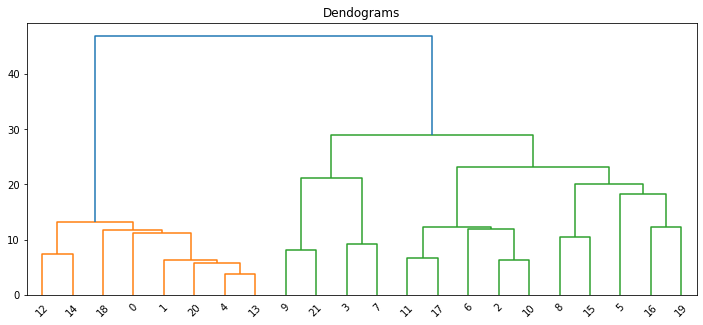

In [8]:
plt.figure(figsize=(12, 5))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(normalized_embi_df.T, method='ward'))

In [9]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(normalized_embi_df.T)

array([1, 1, 3, 0, 1, 2, 3, 0, 2, 0, 3, 3, 1, 1, 1, 2, 2, 3, 1, 2, 1, 0])

In [10]:
# Match countries to clusters, income status, geography
cluster_df_all = pd.DataFrame({'Countries': list(embi_all_countries), 'cluster_label': cluster.labels_})
cluster_df_all = cluster_df_all.sort_values(by=['cluster_label'], ascending=True).reset_index(drop=True)
cluster_df_all = pd.merge(cluster_df_all, wb_class_income, on='Countries', how='left')
cluster_df_all = pd.merge(cluster_df_all, wb_class_region, on='Countries', how='left')
cluster_df_all = cluster_df_all[['Countries', 'cluster_label', 'Income group', 'Region']]
cluster_df_all

,Countries,cluster_label,Income group,Region
0,Venezuela RB,0,NaN,NaN
1,China,0,Upper middle income,East Asia & Pacific
2,Egypt Arab Rep.,0,NaN,NaN
3,Lebanon,0,Upper middle income,Middle East & North Africa
4,Turkey,1,Upper middle income,Europe & Central Asia
5,Philippines,1,Lower middle income,East Asia & Pacific
6,Peru,1,Upper middle income,Latin America & Caribbean
7,Panama,1,High income,Latin America & Caribbean
8,Uruguay,1,High income,Latin America & Caribbean
9,Argentina,1,Upper middle income,Latin America & Caribbean


#### "Rolling" Country Clusters by Year
For each year in our sample, we re-compute the country clusters using EMBIG spreads. Dataframe is outputted below.

In [11]:
# Rolling Clusters
def rolling_clusters(df, num_clusters):
    # Compute different clusters by year
    start_year = df.index.year.unique()[0]
    end_year = df.index.year.unique()[-1]

    for year in list(range(start_year, end_year+1)):
        new_df = df[df.index.year==year]
        cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
        cluster.fit_predict(new_df.T)
        cluster_dict = {'Year': [year]*len(cluster.labels_), 'Countries': list(df), 'cluster_label': cluster.labels_}
        if year == start_year:
            cluster_df = pd.DataFrame(cluster_dict)
        else:
            new_cluster_df = pd.DataFrame(cluster_dict)
            cluster_df = cluster_df.append(new_cluster_df, ignore_index=True)

    cluster_df = cluster_df.sort_values(by=['Year', 'cluster_label'], ascending=[True, True]).reset_index(drop=True)
    return cluster_df

In [12]:
cluster_df_yr = rolling_clusters(normalized_embi_df, 4)

In [13]:
# Output EMBIG_clusters
#cluster_df_yr.to_pickle(OUTPUT_DIR + 'clusters_EMBIG_FI_rolling.pkl')
cluster_df_all.to_pickle(OUTPUT_DIR + 'clusters_EMBIG_FI_full.pkl')

### Hierarchical Clustering - Fixed Income (Sovereign Bonds Index Returns)
Perform hierarchical clustering based on sovereign bond returns. Create a dendrogram that illustrate the hierarchical clustering.

In [22]:
# Read country sovereign bond data
ticker = pd.read_excel(os.path.join(country_data_path, 'ice_bofa_sovereign_indices_data.xlsx'), sheet_name='ticker mapping')
ticker['Country'] = ticker['Index Name'].apply(lambda x:' '.join(x.split()[4:-2]))
ticker['Index Full Name'] = ticker['Index'] + ' Index'
ticker[['Index Full Name', 'Country']].head()

,Index Full Name,Country
0,GDDZ Index,Algeria
1,GDAO Index,Angola
2,GDAR Index,Argentina
3,GDAM Index,Armenia
4,GDAW Index,Aruba


In [23]:
ticker_dict = pd.Series(data=ticker['Country'].values, index=ticker['Index Full Name']).to_dict()

In [24]:
bnd_idx_price = pd.read_excel(os.path.join(country_data_path, 'ice_bofa_sovereign_indices_data.xlsx'), 
                            sheet_name='px_last data',
                            skiprows=3,
                            header=0)
bnd_idx_price.drop(index=[0, 1], inplace=True)
bnd_idx_price.rename(columns={"Unnamed: 0":"Date"}, inplace=True)
bnd_idx_price.set_index('Date', inplace=True)
bnd_idx_price = bnd_idx_price.astype('float')
bnd_idx_price_weekly = bnd_idx_price.resample('W').last()

bnd_idx_price_weekly.rename(columns=ticker_dict, inplace=True)

In [25]:
# Set start date
start_date = '2005-01-01'
bnd_weekly_prices_df = bnd_idx_price_weekly[bnd_idx_price_weekly.index>start_date]
bnd_weekly_prices_df = bnd_weekly_prices_df.dropna(axis=1)
bnd_w_log_ret = np.log(bnd_weekly_prices_df).diff().iloc[1:]

# Normalize
normalized_bnd_ret = (bnd_w_log_ret-bnd_w_log_ret.mean())/bnd_w_log_ret.std()
normalized_bnd_ret = normalized_bnd_ret.dropna(axis=1)

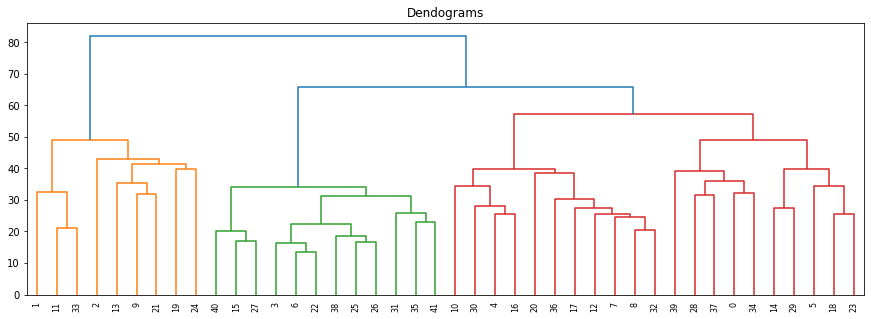

In [26]:
plt.figure(figsize=(15, 5))
plt.title("Dendograms")
dend2 = shc.dendrogram(shc.linkage(normalized_bnd_ret.T, method='ward'))

In [27]:
cluster_ret = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster_ret.fit_predict(normalized_bnd_ret.T)

array([0, 1, 1, 2, 3, 0, 2, 3, 3, 1, 3, 1, 3, 1, 0, 2, 3, 3, 0, 1, 3, 1,
       2, 0, 1, 2, 2, 2, 0, 0, 3, 2, 3, 1, 0, 2, 3, 0, 2, 0, 2, 2])

In [28]:
# Match countries to clusters, income status, geography
cluster_df_ret = pd.DataFrame({'Countries': list(normalized_bnd_ret), 'cluster_label': cluster_ret.labels_})
cluster_df_ret = cluster_df_ret.sort_values(by=['cluster_label'], ascending=True).reset_index(drop=True)
cluster_df_ret = pd.merge(cluster_df_ret, wb_class_income, on='Countries', how='left')
cluster_df_ret = pd.merge(cluster_df_ret, wb_class_region, on='Countries', how='left')
cluster_df_ret = cluster_df_ret[['Countries', 'cluster_label', 'Income group', 'Region']]
cluster_df_ret.head()

,Countries,cluster_label,Income group,Region
0,Bulgaria,0,NaN,NaN
1,Venezuela,0,NaN,NaN
2,South Korea,0,NaN,NaN
3,China,0,Upper middle income,East Asia & Pacific
4,Ukraine,0,Lower middle income,Europe & Central Asia


In [29]:
cluster_ret_df_yr = rolling_clusters(normalized_bnd_ret, 4)

In [30]:
# Output bond index returns clusters
#cluster_ret_df_yr.to_pickle(OUTPUT_DIR + 'clusters_bond_idx_ret_rolling.pkl')
cluster_df_ret.to_pickle(OUTPUT_DIR + 'clusters_bond_idx_ret_full.pkl')

### Hierarchical Clustering - Equity Returns
Perform hierarchical clustering based on country equity returns. Create a dendrogram that illustrate the hierarchical clustering.

In [23]:
country_etfs = pd.read_csv('Data/country_data/ETF_adj_close.csv',index_col=0)
country_etfs.index = pd.to_datetime(country_etfs.index)

In [24]:
# find monthly return - take last date and log returns
country_etfs_w = country_etfs.resample('W').last()
country_etfs_ret = np.log(country_etfs_w).diff()

country_etfs_ret = country_etfs_ret.dropna()
#normalized_etfs_ret = (country_etfs_ret-country_etfs_ret.mean())/country_etfs_ret.std()

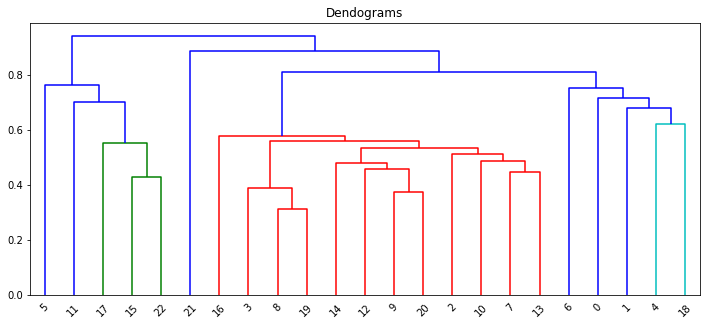

In [25]:
plt.figure(figsize=(12, 5))
plt.title("Dendograms")
dend3 = shc.dendrogram(shc.linkage(country_etfs_ret.T, method='ward'))

In [26]:
cluster_ret_etf = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster_ret_etf.fit_predict(country_etfs_ret.T)

array([1, 1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 1, 3, 3, 2,
       0], dtype=int64)

In [27]:
# Match countries to clusters, income status, geography
cluster_df_ret_etf = pd.DataFrame({'Countries': list(country_etfs_ret), 'cluster_label': cluster_ret_etf.labels_})
cluster_df_ret_etf = cluster_df_ret_etf.sort_values(by=['cluster_label'], ascending=True).reset_index(drop=True)
cluster_df_ret_etf.head()

,Countries,cluster_label
0,Pakistan,0
1,Saudi Arabia,0
2,Qatar,0
3,Egypt,0
4,United Arab Emirates,0


In [28]:
# Output etf index returns clusters
cluster_df_ret_etf.to_pickle(OUTPUT_DIR + 'clusters_equity_etf_full.pkl')

### PCA and K-Means Clustering
We can also illustrate the country clusters using PCA and K-means clustering. We achieved similar clusters to the Hierarchical Clustering above, and noted outliers (e.g., Argentina).

Relevant article about Argentina: https://www.bloomberg.com/news/articles/2020-09-21/argentina-new-dollar-bonds-plunge-deep-into-distressed-territory

In [29]:
# Normalize data and apply PCA
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(embi_all_countries)
pca = PCA()
principal_components = pca.fit_transform(segmentation_std.T)
evr = pca.explained_variance_ratio_

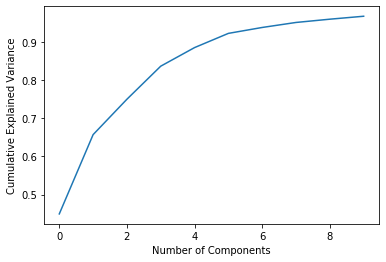

In [30]:
# Plot PCA: cumulative proportion of variance explained by the first 10 PC's 
n_PC = 10
plt.plot(range(n_PC), evr.cumsum()[:n_PC])
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

The cumulative proportion of variance explained by the first 10 principal components of the monthly EMBIG spreads; approximately 4 factors is needed here to explain most of the variance.

In [31]:
# Apply k-means clustering fit
n_clusters = 4
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
# Fit model
kmeans_pca.fit(principal_components)
# Get labels
labels = kmeans_pca.predict(principal_components)

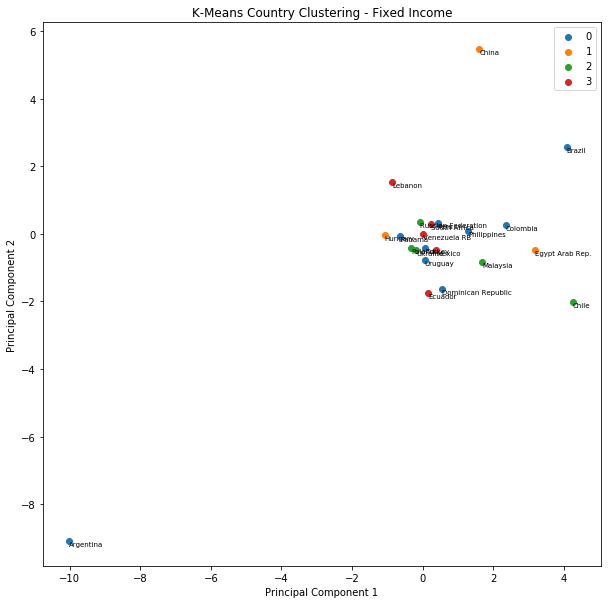

In [32]:
# Plot clusters
fig, ax = plt.subplots(figsize=(10, 10))
for g in np.unique(labels):
    i = np.where(labels == g)
    ax.scatter(principal_components[0][i], principal_components[1][i], label=g)
    
for i, txt in enumerate(list(embi_all_countries)):
    ax.annotate(txt, (principal_components[0][i], principal_components[1][i]),  fontsize = 7, arrowprops=
                dict(facecolor='black', shrink=0.05),
                horizontalalignment='left',
                verticalalignment='top')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("K-Means Country Clustering - Fixed Income")
ax.legend()
plt.show()

In [33]:
km_cluster_df = pd.DataFrame({'Countries': list(embi_all_countries), 'kmeans_cluster_label': labels})
km_cluster_df = km_cluster_df.sort_values(by=['kmeans_cluster_label'], ascending=True).reset_index(drop=True)
km_cluster_df

,Countries,kmeans_cluster_label
0,Argentina,0
1,Brazil,0
2,Colombia,0
3,Dominican Republic,0
4,Turkey,0
5,Uruguay,0
6,Panama,0
7,Peru,0
8,Philippines,0
9,China,1


### Correlation Analysis

In [34]:
# Load swap yields data
swap_yields = pd.read_csv('https://raw.githubusercontent.com/wingwingz/AFP/main/Data/country_data/swap_yields.csv')
swap_yields['date'] = pd.to_datetime(swap_yields['date'], format='%Y%m%d')
swap_yields.index = swap_yields['date']
del swap_yields['date']

In [35]:
# Only grab EM countries
em_countries = ['Brazil', 'Chile', 'China', 'Colombia', 'Indonesia', 'India', 'Malaysia', 'Mexico', 'Philippines', 'Russia', 'South Africa', 'Thailand', 'Turkey']
em_swap_yields = swap_yields[em_countries]

# Calculate swap returns
em_swap_returns = (em_swap_yields.pct_change()).dropna()

In [36]:
# Compute Sharpe Ratios by country using weekly returns
em_swap_ret_w = em_swap_returns.resample('1W').mean()
SR_em = pd.DataFrame(em_swap_ret_w.mean()/em_swap_ret_w.std())
SR_em.columns = ['Sharpe Ratio']

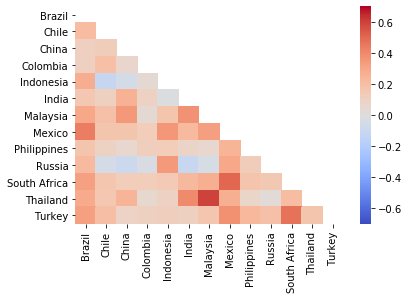

In [37]:
# Construct correlation matrix of weekly returns
corr_em = em_swap_ret_w.corr()
mask = np.triu(np.ones_like(corr_em, dtype=bool))
sns.heatmap(corr_em, mask = mask, annot = False, vmin=-0.7, vmax=0.7, center= 0, cmap= 'coolwarm')
plt.show()

### Risk Score Ranking

The bigger score the better

Z-score ranking for the countries. Potentially:
1. Depending on the regime, invest in the top 10 EM safest in risky periods
2. Overall regime calculation (sum of scores by year)

In [38]:
# risk score ranking
riskscore_link = 'https://github.com/wingwingz/AFP/blob/main/Data/country_data/PRS%20Political%20Risk%20Tables.xls?raw=true'

riskscores = pd.read_excel(riskscore_link,sheet_name=None,skiprows=7,index_col = 0)
riskscores.keys()

dict_keys(['Copyright', 'A-Government Stability', 'B-Socioeconomic Conditions', 'C-Investment Profile', 'D-Internal Conflict', 'E-External Conflict', 'F-Corruption', 'G-Military in Politics', 'H-Religious Tensions', 'I-Law and Order', 'J-Ethnic Tensions', 'K-Democratic Accountability', 'L-Bureaucracy Quality'])

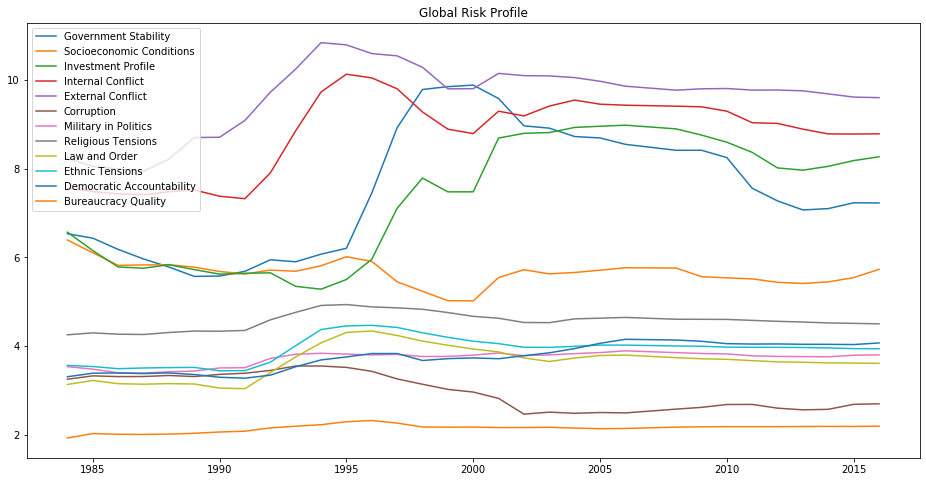

In [39]:
# overall risk score (take avg for each year)
score_category = list(riskscores.keys())[1:]
overall = {}
for cat in score_category:
  overall[cat[2:]] = riskscores[cat].mean()
global_profile = pd.DataFrame(overall)
global_profile.plot(figsize = (16,8), title = 'Global Risk Profile')

In [40]:
# z-score ranking
ranks = {}
for cat in score_category:
  temp = riskscores[cat]
  for col in temp.select_dtypes('object').columns:
    temp[col] = pd.to_numeric(temp[col],errors = 'coerce')
  ranks[cat[2:]] = ((temp - temp.mean())/temp.std()).rank()

In [41]:
ranks['Socioeconomic Conditions'][2016].nlargest(20)

Country
Iceland           140.0
Switzerland       139.0
Germany           138.0
New Zealand       137.0
United States     136.0
Malaysia          135.0
South Korea       134.0
UAE               133.0
Luxembourg        131.5
Norway            131.5
Sweden            129.5
Taiwan            129.5
Brunei            128.0
United Kingdom    127.0
Australia         125.5
Canada            125.5
Hong Kong         123.5
Singapore         123.5
Finland           121.5
Japan             121.5
Name: 2016, dtype: float64

In [42]:
# reformat the risk score into tables sort by year
year_dfs = defaultdict(dict)
for year in range(2000,2017):
  for cat in score_category:
    year_dfs[year][cat[2:]] = ranks[cat[2:]][year]

# determine the PC and cutoff per
pc_cutoff = []
pcs_dict = {}
cntry_dict = {}
# fig, axes = plt.subplots(4,4,figsize = (16,16))
for year in range(2000,2017):
  i = year-2000
  riskdf_ = pd.DataFrame(year_dfs[year])
  scaler = StandardScaler()
  riskdf_ = riskdf_.dropna()
  riskdf_scaled = scaler.fit_transform(riskdf_)
  pca = PCA()
  pcs_ = pca.fit_transform(riskdf_scaled)

  pcs_dict[year] = pcs_
  cntry_dict[year] = list(riskdf_.index)
  evr = pca.explained_variance_ratio_
  evrcum = evr.cumsum()
  cutoff = np.argmax(evrcum>0.9)
  pc_cutoff.append(cutoff)
  n_PC = 12

**6 components can explain about 90\% of the variation**

In [43]:
# get each year's clustering based on optimal pc_cut off
kmeans_dfs = {}
for i, n in enumerate(pc_cutoff):
  year = 2000 + i
  kmeans_pca = KMeans(n_clusters=n, init='k-means++', random_state=42)
  # Get label
  labels = kmeans_pca.fit_predict(pcs_dict[year])
  kmeans_dfs[year] = pd.DataFrame([cntry_dict[year],labels],index=['country','label']).T

In [44]:
consolidated_kmeans = pd.concat(kmeans_dfs)
#consolidated_kmeans.to_pickle('rolling_clusters.pickle')

In [45]:
consolidated_kmeans

country label
2000 0      Albania     1
     1      Algeria     6
     2       Angola     6
     3    Argentina     4
     4      Armenia     1
...             ...   ...
2016 134  Venezuela     4
     135    Vietnam     3
     136      Yemen     4
     137     Zambia     3
     138   Zimbabwe     4

[2363 rows x 2 columns]

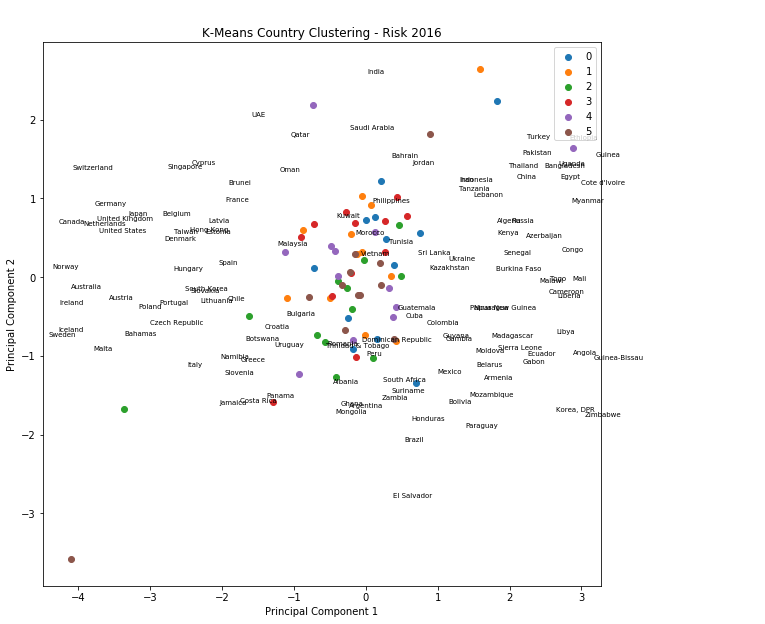

In [46]:
# Plot clusters
fig, ax = plt.subplots(figsize=(10, 10))
for g in np.unique(labels):
    i = np.where(labels == g)
    ax.scatter(pcs_[i][0], pcs_[i][1], label=g)

risk_countries = list(riskdf_.dropna().index)    
for i, txt in enumerate(risk_countries):
    ax.annotate(txt, (pcs_[i][0], pcs_[i][1]),  fontsize = 7, arrowprops=
                dict(facecolor='black', shrink=0.05),
                horizontalalignment='left',
                verticalalignment='top')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("K-Means Country Clustering - Risk 2016")
ax.legend()
plt.show()

In [47]:
kmeansdf = pd.DataFrame([risk_countries,labels],index = ['Country','Label']).T
display(kmeansdf[kmeansdf['Label']==3])

,Country,Label
0,Albania,3
3,Argentina,3
11,Belarus,3
13,Bolivia,3
15,Brazil,3
23,Colombia,3
29,Cuba,3
33,Dominican Republic,3
36,El Salvador,3
42,Gambia,3
